# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [33]:
from unityagents import UnityEnvironment
import numpy as np
import random
import copy

from ddpg_agent import Agent
from collections import deque
from collections import namedtuple, deque
import torch
import matplotlib.pyplot as plt

import torch
import torch.nn.functional as F
import torch.optim as optim

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='Reacher.app')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [13]:
!ls

Continuous_Control.ipynb
Crawler.ipynb
README.md
Reacher.app
Reacher.app.zip
Reacher.app_20.zip
Reacher_20.app
Report.md
__pycache__
checkpoint_actor.pth
checkpoint_critic.pth
ddpg_agent.pt
ddpg_agent.py
ddpg_agent_original.py
drlnd-p2-continuous-control-master
drlnd-p2-continuous-control-master.zip
model.py
model_orginal.py
udacity-deep-reinforcement-learning-p2-continuous-control-master
udacity-deep-reinforcement-learning-p2-continuous-control-master.zip
unity-environment.log


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [16]:
# env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
# states = env_info.vector_observations                  # get the current state (for each agent)
# scores = np.zeros(num_agents)                          # initialize the score (for each agent)
# while True:
#     actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
#     actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#     env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#     next_states = env_info.vector_observations         # get next state (for each agent)
#     rewards = env_info.rewards                         # get reward (for each agent)
#     dones = env_info.local_done                        # see if episode finished
#     scores += env_info.rewards                         # update the score (for each agent)
#     states = next_states                               # roll over states to next time step
#     if np.any(dones):                                  # exit loop if episode finished
#         break
# print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F


def _reset_parameters(layers):
    for layer in layers:
        layer.weight.data.uniform_(-3e-3,3e-3)


class Actor(nn.Module):
    """Actor (Policy) Model."""

    def __init__(self, state_size, action_size, seed, fc_layers=[256,256]):
        """Initialize parameters and build model.
        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            seed (int): Random seed
            fc_layers (list): Number of nodes in hidden layers
        """
        super(Actor, self).__init__()
        self.seed = torch.manual_seed(seed)
        # Define input and output values for the hidden layers
        dims = [state_size] + fc_layers + [action_size]
        # Create the hidden layers
        self.fc_layers = nn.ModuleList(
            [nn.Linear(dim_in, dim_out) for dim_in, dim_out in zip(dims[:-1], dims[1:])])
        # Initialize the hidden layer weights
        _reset_parameters(self.fc_layers)

        print('Actor network built:', self.fc_layers)

    def forward(self, x):
        """Build an actor (policy) network that maps states -> actions."""
        # Pass the input through all the layers apllying ReLU activation, but the last
        for layer in self.fc_layers[:-1]:
            x = F.relu(layer(x))
        # Pass the result through the output layer apllying hyperbolic tangent function
        x = torch.tanh(self.fc_layers[-1](x))
        # Return the better action for the input state
        return x


class Critic(nn.Module):
    """Critic (Value) Model."""

    def __init__(self, state_size, action_size, seed, fc_layers=[128,128]):
        """Initialize parameters and build model.
        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            seed (int): Random seed
            fc_layers (list): Number of nodes in hidden layers
        """
        super(Critic, self).__init__()
        self.seed = torch.manual_seed(seed)
        # Append the output size to the layers's dimensions
        dims = fc_layers + [1]
        # Create a list of layers
        layers_list = []
        layers_list.append(nn.Linear(state_size, dims[0]))
        # The second layer receives the the first layer output + action
        layers_list.append(nn.Linear(dims[0] + action_size, dims[1]))
        # Build the next layers, if that is the case
        for dim_in, dim_out in zip(dims[1:-1], dims[2:]):
            layers_list.append(nn.Linear(dim_in, dim_out))
        # Store the layers as a ModuleList
        self.fc_layers = nn.ModuleList(layers_list)
        # Initialize the hidden layer weights
        _reset_parameters(self.fc_layers)
        # Add batch normalization to the first hidden layer
        self.bn = nn.BatchNorm1d(dims[0])

        print('Critic network built:', self.fc_layers)

    def forward(self, state, action):
        """Build a critic (value) network that maps (state, action) pairs -> Q-values."""
        # Pass the states into the first layer
        x = self.fc_layers[0](state)
        x = self.bn(x)
        x = F.relu(x)
        # Concatenate the first layer output with the action
        x = torch.cat((x, action), dim=1)
        # Pass the input through all the layers apllying ReLU activation, but the last
        for layer in self.fc_layers[1:-1]:
            x = F.relu(layer(x))
        # Pass the result through the output layer apllying sigmoid activation
        x = torch.sigmoid(self.fc_layers[-1](x))
        # Return the Q-Value for the input state-action
        return x


In [30]:
BUFFER_SIZE = int(1e5)  # replay buffer size
BATCH_SIZE = 128        # minibatch size
GAMMA = 0.99            # discount factor
TAU = 1e-3              # for soft update of target parameters
LR_ACTOR = 1e-3         # learning rate of the actor 
LR_CRITIC = 1e-3        # learning rate of the critic
WEIGHT_DECAY = 0        # L2 weight decay
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
NOISE_DECAY = 0.999

class Agent():
    """Interacts with and learns from the environment."""
    
    def __init__(self, state_size, action_size, random_seed):
        """Initialize an Agent object.
        
        Params
        ======
            state_size (int): dimension of each state
            action_size (int): dimension of each action
            random_seed (int): random seed
        """
        self.state_size = state_size
        self.action_size = action_size
        self.seed = random.seed(random_seed)

        # Actor Network
        self.actor_local = Actor(state_size, action_size, random_seed, [256, 256]).to(DEVICE)
        self.actor_target = Actor(state_size, action_size, random_seed, [256, 256]).to(DEVICE)
        self.actor_optimizer = optim.Adam(self.actor_local.parameters(), lr=LR_ACTOR)

        # Critic Network
        self.critic_local = Critic(state_size, action_size, random_seed, [256, 256]).to(DEVICE)
        self.critic_target = Critic(state_size, action_size, random_seed, [256, 256]).to(DEVICE)
        self.critic_optimizer = optim.Adam(self.critic_local.parameters(), lr=LR_CRITIC)

        # Initialize target networks weights with the local networks ones
        self.soft_update(self.actor_local, self.actor_target, 1)
        self.soft_update(self.critic_local, self.critic_target, 1)

        # Noise process
        self.noise = OUNoise(action_size, random_seed)
        
        self.noise_decay = NOISE_DECAY

        # Replay memory
        self.memory = ReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE, random_seed)
    
    def step(self, state, action, reward, next_state, done):
        """Save experience in replay memory, and use random sample from buffer to learn."""
        # Save experience / reward
        self.memory.add(state, action, reward, next_state, done)

        # Learn, if enough samples are available in memory
        if len(self.memory) > BATCH_SIZE:
            experiences = self.memory.sample()
            self.learn(experiences, GAMMA)

    def act(self, state, add_noise=True):
        """Returns actions for given state as per current policy."""
        state = torch.from_numpy(state).float().to(DEVICE)
        self.actor_local.eval()
        with torch.no_grad():
            action = self.actor_local(state).cpu().data.numpy()
        self.actor_local.train()
        if add_noise:
            action += self.noise_decay * self.noise.sample()
            self.noise_decay *= self.noise_decay
        return np.clip(action, -1, 1)

    def reset(self):
        self.noise.reset()

    def learn(self, experiences, gamma):
        """Update policy and value parameters using given batch of experience tuples.
        Q_targets = r + γ * critic_target(next_state, actor_target(next_state))
        where:
            actor_target(state) -> action
            critic_target(state, action) -> Q-value

        Params
        ======
            experiences (Tuple[torch.Tensor]): tuple of (s, a, r, s', done) tuples 
            gamma (float): discount factor
        """
        states, actions, rewards, next_states, dones = experiences

        # ---------------------------- update critic ---------------------------- #
        # Get predicted next-state actions and Q values from target models
        actions_next = self.actor_target(next_states)
        Q_targets_next = self.critic_target(next_states, actions_next)
        # Compute Q targets for current states (y_i)
#         Q_targets = rewards + (gamma * Q_targets_next * (1 - dones))
        Q_targets = rewards + (GAMMA * Q_targets_next)
        # Compute critic loss
        Q_expected = self.critic_local(states, actions)
        critic_loss = F.mse_loss(Q_expected, Q_targets)
        # Minimize the loss
        self.critic_optimizer.zero_grad()
        critic_loss.backward()
        self.critic_optimizer.step()

        # ---------------------------- update actor ---------------------------- #
        # Compute actor loss
        actions_pred = self.actor_local(states)
        actor_loss = -self.critic_local(states, actions_pred).mean()
        # Minimize the loss
        self.actor_optimizer.zero_grad()
        actor_loss.backward()
        self.actor_optimizer.step()

        # ----------------------- update target networks ----------------------- #
        self.soft_update(self.critic_local, self.critic_target, TAU)
        self.soft_update(self.actor_local, self.actor_target, TAU)                     

    def soft_update(self, local_model, target_model, tau):
        """Soft update model parameters.
        θ_target = τ*θ_local + (1 - τ)*θ_target

        Params
        ======
            local_model: PyTorch model (weights will be copied from)
            target_model: PyTorch model (weights will be copied to)
            tau (float): interpolation parameter 
        """
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)

class OUNoise:
    """Ornstein-Uhlenbeck process."""

    def __init__(self, size, seed, mu=0., theta=0.15, sigma=0.2):
        """Initialize parameters and noise process."""
        self.mu = mu * np.ones(size)
        self.theta = theta
        self.sigma = sigma
        self.seed = random.seed(seed)
        self.reset()

    def reset(self):
        """Reset the internal state (= noise) to mean (mu)."""
        self.state = copy.copy(self.mu)

    def sample(self):
        """Update internal state and return it as a noise sample."""
        x = self.state
        dx = self.theta * (self.mu - x) + self.sigma * np.array([random.random() for i in range(len(x))])
        self.state = x + dx
        return self.state

class ReplayBuffer:
    """Fixed-size buffer to store experience tuples."""

    def __init__(self, action_size, buffer_size, batch_size, seed):
        """Initialize a ReplayBuffer object.
        Params
        ======
            buffer_size (int): maximum size of buffer
            batch_size (int): size of each training batch
        """
        self.memory = deque(maxlen=buffer_size)  # internal memory (deque)
        self.batch_size = batch_size
        self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])
        self.seed = random.seed(seed)
    
    def add(self, state, action, reward, next_state, done):
        """Add a new experience to memory."""
        e = self.experience(state, action, reward, next_state, done)
        self.memory.append(e)
    
    def sample(self):
        """Randomly sample a batch of experiences from memory."""
        experiences = random.sample(self.memory, k=self.batch_size)

        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(DEVICE)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).float().to(DEVICE)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(DEVICE)
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(DEVICE)
        dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(DEVICE)

        return (states, actions, rewards, next_states, dones)

    def __len__(self):
        """Return the current size of internal memory."""
        return len(self.memory)

In [34]:
# Create the Agent
agent = Agent(state_size, action_size, random_seed=0)

In [9]:
max_t = 2000
n_episodes = 1000
print_every = 50
scores_deque = deque(maxlen=print_every)
score_list = []
for i_episode in range(1, n_episodes+1):
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    state = env_info.vector_observations

    agent.noise.reset()
    scores = 0
    epi_score = []
    for t in range(max_t):
        actions = agent.act(state)      
        env_info = env.step(actions)[brain_name] 

        reward = env_info.rewards 
        reward = reward[0]
        
        next_state = env_info.vector_observations       
        dones = env_info.local_done   
        done = dones[0]
        
        agent.step(state, actions, reward, next_state)
        state = next_state
        
        scores += reward
        if np.any(dones):
            break 
    score_list.append(scores)
    print(i_episode, scores)
    scores_deque.append(scores)
    print('\rEpisode \tScore:{:.2f} {}\tAverage Score: {:.2f}'.format(i_episode, scores, np.mean(scores_deque)))
    torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
    torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
    if i_episode % print_every == 0:
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))        
        ## Save the model along with some training information
        checkpoint = {
            'actor_dict': agent.actor_local.state_dict(),
            'critic_dict': agent.critic_local.state_dict(),
            'episodes': i_episode,
            'scores': scores,
            }
        print('\nSaving model ...', end=' ')
        torch.save(checkpoint, 'ddpg_agent.pt')
        print('done.')

1 0.0
Episode 1	Average Score: 0.00
2 1.149999974295497
Episode 2	Average Score: 0.57
3 0.1699999962002039
Episode 3	Average Score: 0.44
4 0.909999979659915
Episode 4	Average Score: 0.56
5 0.0
Episode 5	Average Score: 0.45
6 0.04999999888241291
Episode 6	Average Score: 0.38
7 0.23999999463558197
Episode 7	Average Score: 0.36
8 1.4399999678134918
Episode 8	Average Score: 0.49
9 1.2999999709427357
Episode 9	Average Score: 0.58
10 1.4399999678134918
Episode 10	Average Score: 0.67
11 0.8599999807775021
Episode 11	Average Score: 0.69
12 1.099999975413084
Episode 12	Average Score: 0.72
13 0.3899999912828207
Episode 13	Average Score: 0.70
14 0.5699999872595072
Episode 14	Average Score: 0.69
15 0.8499999810010195
Episode 15	Average Score: 0.70
16 0.4599999897181988
Episode 16	Average Score: 0.68
17 1.6399999633431435
Episode 17	Average Score: 0.74
18 0.4399999901652336
Episode 18	Average Score: 0.72
19 1.6399999633431435
Episode 19	Average Score: 0.77
20 1.699999962002039
Episode 20	Average Sc

153 7.329999836161733
Episode 153	Average Score: 6.76
154 3.279999926686287
Episode 154	Average Score: 6.71
155 4.699999894946814
Episode 155	Average Score: 6.74
156 6.38999985717237
Episode 156	Average Score: 6.80
157 8.509999809786677
Episode 157	Average Score: 6.89
158 0.6899999845772982
Episode 158	Average Score: 6.81
159 2.6199999414384365
Episode 159	Average Score: 6.79
160 4.049999909475446
Episode 160	Average Score: 6.79
161 14.139999683946371
Episode 161	Average Score: 7.06
162 8.339999813586473
Episode 162	Average Score: 7.18
163 6.569999853149056
Episode 163	Average Score: 7.24
164 9.919999778270721
Episode 164	Average Score: 7.37
165 10.799999758601189
Episode 165	Average Score: 7.48
166 12.969999710097909
Episode 166	Average Score: 7.58
167 2.4299999456852674
Episode 167	Average Score: 7.58
168 9.21999979391694
Episode 168	Average Score: 7.67
169 13.929999688640237
Episode 169	Average Score: 7.81
170 9.289999792352319
Episode 170	Average Score: 7.84
171 12.249999726191163


301 8.489999810233712
Episode 301	Average Score: 10.08
302 6.2799998596310616
Episode 302	Average Score: 10.08
303 10.499999765306711
Episode 303	Average Score: 10.08
304 8.589999807998538
Episode 304	Average Score: 9.88
305 3.969999911263585
Episode 305	Average Score: 9.61
306 7.93999982252717
Episode 306	Average Score: 9.61
307 4.539999898523092
Episode 307	Average Score: 9.45
308 8.449999811127782
Episode 308	Average Score: 9.45
309 7.7399998269975185
Episode 309	Average Score: 9.39
310 9.699999783188105
Episode 310	Average Score: 9.50
311 6.4499998558312654
Episode 311	Average Score: 9.36
312 12.749999715015292
Episode 312	Average Score: 9.56
313 10.719999760389328
Episode 313	Average Score: 9.18
314 6.899999845772982
Episode 314	Average Score: 9.13
315 17.219999615103006
Episode 315	Average Score: 9.25
316 9.669999783858657
Episode 316	Average Score: 9.21
317 8.039999820291996
Episode 317	Average Score: 9.26
318 20.339999545365572
Episode 318	Average Score: 9.32
319 13.10999970696

448 14.629999672994018
Episode 448	Average Score: 12.91
449 9.259999793022871
Episode 449	Average Score: 12.89
450 16.939999621361494
Episode 450	Average Score: 13.02
Episode 450	Average Score: 13.02

Saving model ... done.
451 12.209999727085233
Episode 451	Average Score: 13.08
452 20.01999955251813
Episode 452	Average Score: 13.25
453 22.80999949015677
Episode 453	Average Score: 13.54
454 12.54999971948564
Episode 454	Average Score: 13.63
455 20.589999539777637
Episode 455	Average Score: 13.87
456 23.599999472498894
Episode 456	Average Score: 14.08
457 23.729999469593167
Episode 457	Average Score: 14.40
458 13.809999691322446
Episode 458	Average Score: 14.43
459 22.899999488145113
Episode 459	Average Score: 14.62
460 14.28999968059361
Episode 460	Average Score: 14.79
461 18.62999958358705
Episode 461	Average Score: 14.99
462 9.269999792799354
Episode 462	Average Score: 15.13
463 25.899999421089888
Episode 463	Average Score: 15.35
464 19.889999555423856
Episode 464	Average Score: 15.6

593 38.76999913342297
Episode 593	Average Score: 31.01
594 34.529999228194356
Episode 594	Average Score: 31.06
595 25.529999429360032
Episode 595	Average Score: 31.05
596 33.30999925546348
Episode 596	Average Score: 31.04
597 28.069999372586608
Episode 597	Average Score: 30.96
598 31.659999292343855
Episode 598	Average Score: 30.87
599 33.57999924942851
Episode 599	Average Score: 30.93
600 32.24999927915633
Episode 600	Average Score: 30.98
Episode 600	Average Score: 30.98

Saving model ... done.
601 32.79999926686287
Episode 601	Average Score: 30.91
602 28.239999368786812
Episode 602	Average Score: 30.91
603 34.26999923400581
Episode 603	Average Score: 30.87
604 30.23999932408333
Episode 604	Average Score: 30.78
605 22.609999494627118
Episode 605	Average Score: 30.53
606 31.0599993057549
Episode 606	Average Score: 30.40
607 24.77999944612384
Episode 607	Average Score: 30.19
608 31.379999298602343
Episode 608	Average Score: 30.14
609 36.999999172985554
Episode 609	Average Score: 30.22
6

738 29.919999331235886
Episode 738	Average Score: 33.24
739 29.54999933950603
Episode 739	Average Score: 33.26
740 20.199999548494816
Episode 740	Average Score: 33.06
741 25.049999440088868
Episode 741	Average Score: 32.82
742 29.66999933682382
Episode 742	Average Score: 32.72
743 28.53999936208129
Episode 743	Average Score: 32.58
744 35.499999206513166
Episode 744	Average Score: 32.58
745 31.699999291449785
Episode 745	Average Score: 32.53
746 37.78999915532768
Episode 746	Average Score: 32.59
747 24.999999441206455
Episode 747	Average Score: 32.37
748 35.50999920628965
Episode 748	Average Score: 32.39
749 33.6999992467463
Episode 749	Average Score: 32.29
750 24.55999945104122
Episode 750	Average Score: 32.17
Episode 750	Average Score: 32.17

Saving model ... done.
751 31.029999306425452
Episode 751	Average Score: 32.07
752 29.93999933078885
Episode 752	Average Score: 31.97
753 31.549999294802547
Episode 753	Average Score: 31.92
754 28.979999352246523
Episode 754	Average Score: 31.80


883 35.26999921165407
Episode 883	Average Score: 32.48
884 28.279999367892742
Episode 884	Average Score: 32.73
885 29.34999934397638
Episode 885	Average Score: 32.62
886 34.059999238699675
Episode 886	Average Score: 32.81
887 30.94999930821359
Episode 887	Average Score: 32.75
888 31.749999290332198
Episode 888	Average Score: 32.83
889 29.259999345988035
Episode 889	Average Score: 32.72
890 27.10999939404428
Episode 890	Average Score: 32.62
891 20.959999531507492
Episode 891	Average Score: 32.72
892 32.13999928161502
Episode 892	Average Score: 32.71
893 34.42999923042953
Episode 893	Average Score: 33.01
894 36.02999919466674
Episode 894	Average Score: 33.25
895 35.689999202266335
Episode 895	Average Score: 33.38
896 32.09999928250909
Episode 896	Average Score: 33.41
897 22.979999486356974
Episode 897	Average Score: 33.15
898 37.67999915778637
Episode 898	Average Score: 33.14
899 30.719999313354492
Episode 899	Average Score: 33.12
900 35.9399991966784
Episode 900	Average Score: 33.10
Epi

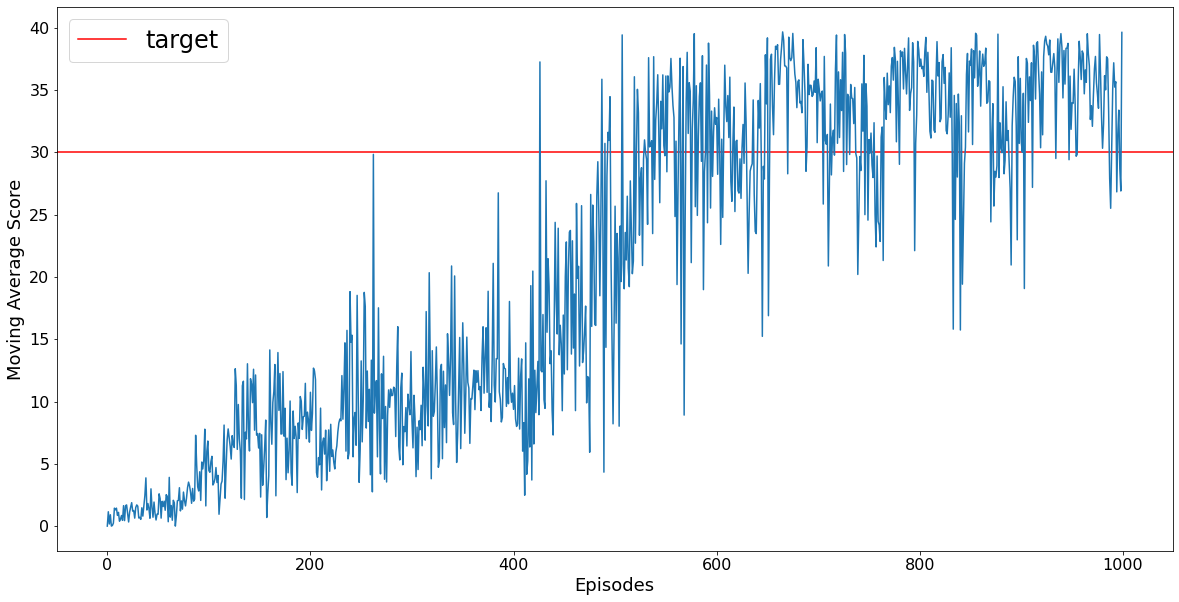

In [28]:
plt.figure(figsize=(20,10))
plt.axhline(y=30,c='r',label='target')
plt.plot(score_list)
plt.legend(fontsize=24)
plt.xlabel('Episodes', fontsize=18)
plt.ylabel('Moving Average Score', fontsize=18)
plt.xticks(fontsize= 16)
plt.yticks(fontsize= 16)
plt.savefig('Performance.jpg')
plt.show()

When finished, you can close the environment.

In [ ]:
# Load the trained model
checkpoint = torch.load('ddpg_agent.pt', map_location='cpu')
agent = Agent(state_size, action_size, random_seed=0)
agent.actor_local.load_state_dict(checkpoint['actor_dict'])
agent.critic_local.load_state_dict(checkpoint['critic_dict'])

In [ ]:
## Watch the agent performing in the environment
scores_episode = np.zeros(num_agents)
for i in range(1000):
    actions = agent.act(states, noise=False)
    env_info = env.step(actions)[brain_name]
    states = env_info.vector_observations
    rewards = env_info.rewards
    scores_episode += rewards

print('Score for this episode: {:.2f}'.format(scores_episode.mean()))

In [ ]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```